## ML - 1

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
data = pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class Label
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Class Label,0


In [7]:
# Seperating dependent and Independent Features
X = data.iloc[:,:-1]
y = data['Class Label']

In [8]:
# Split the data for train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# APply LDA
lda = LinearDiscriminantAnalysis(n_components = 2)
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

In [15]:
# Classification model
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = logistic.predict(X_test)

In [23]:
# Metrics
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nReport:",classification_report(y_test,y_pred))
print("\nConfusion Matrix:",confusion_matrix(y_test,y_pred))

Accuracy: 1.0

Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## ML - 2

In [24]:
from sklearn.metrics import r2_score,mean_squared_error
df = pd.read_csv('/content/diabetes.csv')

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Univariate Analysis - mean,median,mode,variance,standard deviation,skewness,kurtosis

In [28]:
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print("Mean:\n\n",df.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print("Median:\n\n",df.median())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print("Mode:\n\n",df.mode().iloc[0])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print("Variance:\n\n",df.var())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print("Standard Deviation:\n\n",df.std())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print("Skewness:\n\n",df.skew())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print("Kurtosis:\n\n",df.kurt())

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Mean:

 Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Median:

 Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Mode:

 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               70.000
SkinThickness                0.000
Insulin     

# Bivariate Analysis

In [29]:
# Seperation of Dependent and Independent Variable
X = df.iloc[:,:-1]
y = df['Outcome']

In [30]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
# Linear Regression
linear = LinearRegression()
linear.fit(X_train,y_train)
linear_pred = linear.predict(X_test)

In [32]:
accuracy = r2_score(y_test,linear_pred)
print("Accuracy:",accuracy)

Accuracy: 0.25500281176741757


In [33]:
# Logistics Regression
model = LogisticRegression()
model.fit(X_train,y_train)
logistic_pred = model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test,logistic_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7467532467532467


Thus Logistic performs better with this data.

## ML - 3

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,recall_score

In [61]:
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [62]:
dataset.drop('User ID',axis=1,inplace=True)

In [63]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [64]:
X = dataset.iloc[:,[2,3]] # Features taken Age and Estimated Salary
y = dataset['Purchased']
X,y

(     EstimatedSalary  Purchased
 0              19000          0
 1              20000          0
 2              43000          0
 3              57000          0
 4              76000          0
 ..               ...        ...
 395            41000          1
 396            23000          1
 397            20000          1
 398            33000          0
 399            36000          1
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [57]:
# SPlit the training and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [59]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[52,  0],
       [ 0, 28]])

In [51]:
# Accuracy
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
# Error
error = 1 - accuracy
print("Error:",error)
# Precision
precision = precision_score(y_test,y_pred)
print("Precision:",precision)
# Recall
recall = recall_score(y_test,y_pred)
print("Recall:",recall)

Accuracy: 1.0
Error: 0.0
Precision: 1.0
Recall: 1.0


## ML-4

In [69]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data = pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class Label
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
X = data.iloc[:,1:-1]

In [71]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
# Determining Optimal Number
inertia = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)
print(inertia)

[600.0000000000003, 223.73200573676343, 192.03717409190025, 114.6822160993797, 91.29544474066981, 81.7602613286062, 80.98238131032987, 68.08623905064636, 59.38528882045365, 52.989997210158606]


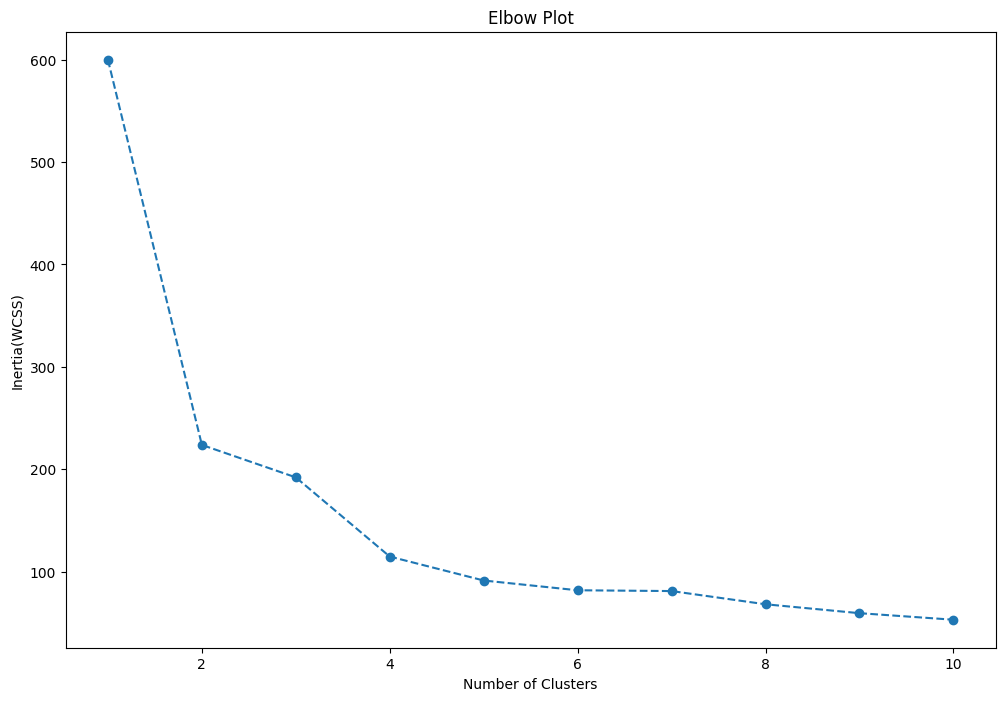

In [74]:
# Plot the Elbow Plot
plt.figure(figsize=(12,8))
plt.plot(range(1,11),inertia,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia(WCSS)')
plt.title('Elbow Plot')
plt.show()

## ML - 5

In [75]:
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('/content/car_evaluation.csv')
data.head()

,Buying price,Maintance cost,No of doors,No of persons,lug_boot,safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [77]:
from sklearn.preprocessing import LabelEncoder
data = data.apply(LabelEncoder().fit_transform)
data.head()

,Buying price,Maintance cost,No of doors,No of persons,lug_boot,safety,Decision
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [78]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [80]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [81]:
# Metrics
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9739884393063584
Confusion Matrix:
 [[ 75   6   2   0]
 [  0  11   0   0]
 [  0   0 235   0]
 [  1   0   0  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.65      1.00      0.79        11
           2       0.99      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.98       346



## ML-6 - Not Completed

In [83]:
import numpy as np
maze = np.array(
    [
        [0,0,0,0,0],
        [0,1,0,1,0],
        [0,0,0,0,0],
        [0,1,1,1,0],
        [0,0,0,0,2] # 2 is the goal
    ]
)
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1
num_episodes = 1000
num_state,num_actions = maze.size,4
Q = np.zeros((num_state,num_actions))

for _ in range(num_episodes):
  state = 0
  while True:
    action = np.random